In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import copy
import math
import seaborn as sn

### Question 01. 

Build a predictive linear regression model for given dataset, train the model for
training set and test it against test dataset, plot the model using any plotting
library.

In [2]:
# Reading in the training data
try:
    train_data = pd.read_csv("trainQ1.csv")
except Exception as e:
    print(f"Error : {e}")

In [3]:
# Reading in the testing data
try:
    test_data = pd.read_csv("testQ1.csv")
except Exception as e:
    print(f"Error : {e}")

### Data Cleaning and PreProcessing

In [4]:
train_data.head(5)     # First 10 rows of the training data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
train_data.describe()   # detailed descriptive analysis of data

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [6]:
test_data.describe()   # detailed descriptive analysis of data

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


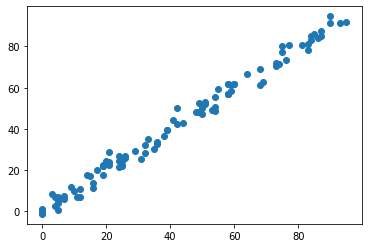

In [7]:
# visual representation of the training data to find any observable relationships between provided attributes
plt.scatter(train_data['x'][:100], train_data['y'][:100])
plt.show()

In [8]:
train_data.dtypes   # type information of columns

x    float64
y    float64
dtype: object

In [9]:
train_data.isnull().any()   # checking for the presence of null values

x    False
y     True
dtype: bool

In [10]:
# Replacing NaN values with mean of respective columns
train_data['x'] = train_data['x'].replace(np.NaN, train_data['x'].mean())
train_data['y'] = train_data['y'].replace(np.NaN, train_data['y'].mean())

In [11]:
train_data.isnull().any()   # re-checking for the presence of null values after mean replacement

x    False
y    False
dtype: bool

In [12]:
train_data.describe()   # calling the summary of data to check for inconsistencies

,x,y
count,700.000000,700.000000
mean,54.985939,49.939869
std,134.681703,29.088388
min,0.000000,-3.839981
25%,25.000000,24.985830
50%,49.000000,49.095828
75%,75.000000,74.880631
max,3530.157369,108.871618


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x'>

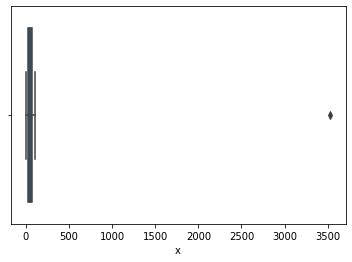

In [13]:
# Boxplot to find the outliers in the column 'x'
sn.boxplot(train_data['x'])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

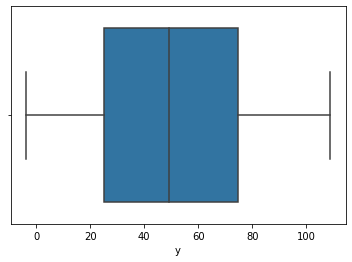

In [14]:
# Boxplot to find the outliers in the column 'y'
sn.boxplot(train_data['y'])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x'>

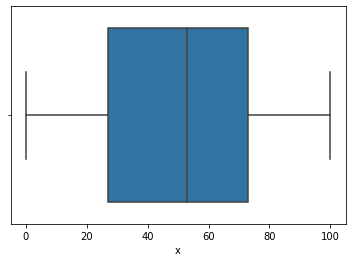

In [15]:
sn.boxplot(test_data['x'])

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

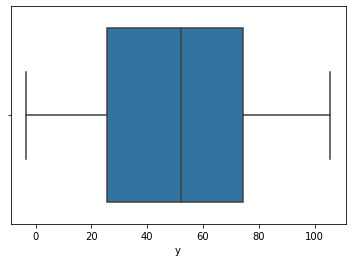

In [16]:
sn.boxplot(test_data['y'])

In [17]:
# Remove the outlier from the whole dataset
# def remove_outlier(data):
#     low = .25
#     high = .75
#     quant_df = data.quantile([low, high])
#     for name in list(data.columns):
#             data = data[(data[name] > quant_df.loc[low, name]) & (data[name] < quant_df.loc[high, name])]
#     return data

In [18]:
test_data.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


In [19]:
# Remove the outlier from the whole dataset
def remove_outlier(data):
    quant_df = data.quantile([0.30, 0.70])
    for name in list(data.columns): data = data[(data[name] > quant_df.loc[0.30, name]) & (data[name] < quant_df.loc[0.70, name])]
    return data

In [20]:
train_data= remove_outlier(train_data)  # removing outliers from training data
test_data = remove_outlier(test_data)    # removing outliers from testing data 

In [21]:
test_data.describe()

,x,y
count,112.000000,112.000000
mean,51.339286,51.684446
std,9.965303,9.859978
min,33.000000,33.378344
25%,42.000000,42.643535
50%,53.000000,52.170557
75%,59.250000,59.739333
max,68.000000,68.488207


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x'>

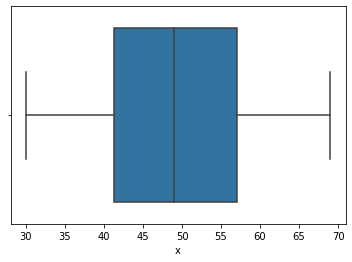

In [22]:
sn.boxplot(train_data['x'])


c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

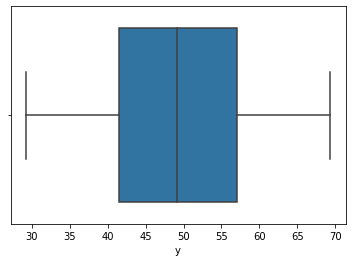

In [23]:
sn.boxplot(train_data['y'])

### Distribution plot of the feature variable 'x' and target variable 'y'

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

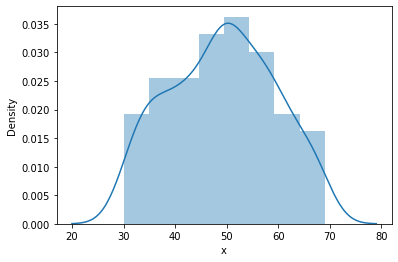

In [24]:
sn.distplot(train_data['x'])

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

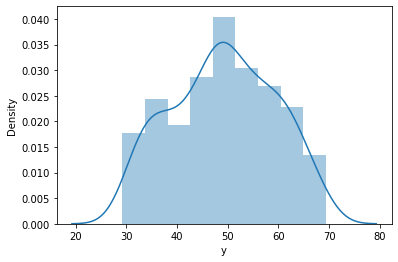

In [25]:
sn.distplot(train_data['y'])

In [26]:
train_data.describe()

,x,y
count,266.000000,266.000000
mean,49.142857,49.137549
std,10.196294,10.131236
min,30.000000,29.196932
25%,41.250000,41.434909
50%,49.000000,49.095828
75%,57.000000,57.072495
max,69.000000,69.358484


In [27]:
train_data['x'].skew()

-0.02439786263708782

In [28]:
train_data['y'].skew()

-0.04888645829473886

### Gradient Descent Algorithm

**Cost Function**

For Univariate Linear Regression, We have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b $$
In linear regression, we utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

In [30]:
#Function to calculate the cost
def cost_computation(x_values, y_values, w, b):
    m = x_values.shape[0] 
    cost = 0
    
    for i in range(m):
        function_wb = w * x_values[i] + b
        cost = cost + (function_wb - y_values[i])**2
    total_cost = (1 / (2 * m)) * cost

    return total_cost

*Gradient Descent* is described as follows:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}   \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  

In [31]:
def gradient_computation(x, y, w, b): 
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    for i in range(m):  
        function_wb = w * x[i] + b 
        dj_dw_i = (function_wb - y[i]) * x[i] 
        dj_db_i = function_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
    return dj_dw, dj_db

In [32]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iterations, gradient_function):  
    w = copy.deepcopy(w_in)
    b = b_in
    w = w_in
    for i in range(num_iterations):
        dj_dw, dj_db = gradient_function(x, y, w , b)     
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            
    return w, b 

In [33]:
train_data.describe()   # Checking the training data before implementing the algorithm

,x,y
count,266.000000,266.000000
mean,49.142857,49.137549
std,10.196294,10.131236
min,30.000000,29.196932
25%,41.250000,41.434909
50%,49.000000,49.095828
75%,57.000000,57.072495
max,69.000000,69.358484


In [34]:
# A function to normalize the input data  ---> Here we are scaling the features for better implementation
def normalize(data):
	for i in range(data.size):
		data[i] = ((data[i] - np.mean(data))/np.std(data))

In [35]:
x_train = train_data['x'].values
normalize(x_train)  # Here we are scaling the features for better implementation
print(x_train)

[ 8.42226153e-02 -1.03248328e+00 -1.16198519e+00 -8.47173151e-01
  4.64730016e-01  9.61491482e-01  1.59619806e+00  7.97586522e-01
  4.88532208e-01  7.91991028e-01  1.30954244e-01  6.95407910e-02
 -3.40991634e-01  9.16971613e-01 -5.06142204e-01  1.44250151e+00
  7.83854538e-01 -6.37874927e-01  8.46009693e-01  3.45590249e-01
 -7.62129152e-01 -7.21739819e-02  8.41853926e-01  1.44004466e+00
  7.93933636e-01  3.89255969e-01  3.37975149e-01  1.14266355e+00
  8.07209400e-01 -1.39938640e-01  3.12978365e-01 -6.11543567e-01
  5.40225084e-01 -4.52964978e-02  6.02098811e-01  6.60281189e-01
 -3.80911006e-01  1.99811668e-01  2.06931575e-01 -4.99661115e-01
  7.23969376e-01  3.77929219e-01 -1.44339785e-02  8.33681357e-01
 -4.87452358e-01 -8.79118766e-02  3.55638298e-01  7.46558127e-01
  2.26245359e-01  4.27409171e-02 -1.38992046e-01  1.32132461e+00
  3.47919474e-01  1.32957905e+00  6.89115330e-01  7.87138373e-01
  7.01266659e-01 -1.15188654e-01  4.36680507e-01  1.21066944e+00
  1.81787991e-01  5.91394

In [36]:
y_train = train_data['y'].values
normalize(y_train)  # Here we are scaling the features for better implementation

In [37]:
try:
    w_init = 0
    b_init = 0
    iteration_count = 10000
    # alpha_value = 1.0e-2
    alpha_value = 0.001
    # calling the gradient descent function
    w_final, b_final = gradient_descent(x_train,y_train, w_init, b_init, alpha_value, iteration_count, gradient_computation)
    print(f"(w,b) found by gradient descent: ({w_final},{b_final})")
except Exception as e:
    print(f"Error : {e}")

(w,b) found by gradient descent: (1.0050376732105057,-0.00918169811362149)


In [38]:
test_data.describe()    # Displaying a summary of the test data

,x,y
count,112.000000,112.000000
mean,51.339286,51.684446
std,9.965303,9.859978
min,33.000000,33.378344
25%,42.000000,42.643535
50%,53.000000,52.170557
75%,59.250000,59.739333
max,68.000000,68.488207


In [39]:
test_data.isnull().any()    # checking for the presence fo any null values in the dataset

x    False
y    False
dtype: bool

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x'>

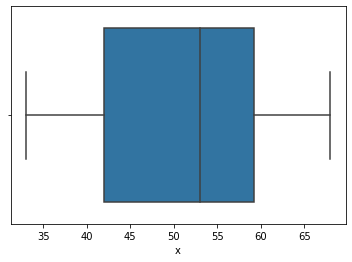

In [40]:
sn.boxplot(test_data['x'])

In [41]:
def y_calculated(x_value, w, b):
    return w * x_value + b  

In [42]:
try:
    x_test = test_data['x'].values
    y_expected = test_data['y'].values
    y_test = np.array([y_calculated(i, w_final, b_final) for i in x_test])
except Exception as e:
    print(f"Error : {e}")

In [43]:
x_test

array([36, 62, 62, 36, 65, 51, 58, 33, 47, 53, 33, 50, 37, 68, 40, 35, 52,
       59, 39, 64, 57, 61, 41, 50, 55, 46, 53, 52, 56, 48, 40, 39, 59, 43,
       67, 38, 63, 60, 42, 41, 66, 64, 41, 47, 64, 59, 64, 53, 63, 60, 35,
       60, 63, 42, 46, 54, 49, 43, 66, 37, 54, 56, 58, 46, 37, 54, 51, 46,
       61, 57, 40, 67, 45, 59, 44, 55, 55, 48, 42, 39, 37, 65, 56, 46, 54,
       39, 44, 68, 38, 56, 60, 65, 67, 36, 45, 57, 34, 55, 55, 56, 58, 58,
       64, 59, 42, 43, 61, 41, 46, 55, 62, 47], dtype=int64)

In [44]:
y_test

array([36.17217454, 62.30315404, 62.30315404, 36.17217454, 65.31826706,
       51.24773964, 58.28300335, 33.15706152, 47.22758894, 53.25781498,
       33.15706152, 50.24270196, 37.17721221, 68.33338008, 40.19232523,
       35.16713686, 52.25277731, 59.28804102, 39.18728756, 64.31322939,
       57.27796567, 61.29811637, 41.1973629 , 50.24270196, 55.26789033,
       46.22255127, 53.25781498, 52.25277731, 56.272928  , 48.23262662,
       40.19232523, 39.18728756, 59.28804102, 43.20743825, 67.32834241,
       38.18224988, 63.30819171, 60.29307869, 42.20240058, 41.1973629 ,
       66.32330473, 64.31322939, 41.1973629 , 47.22758894, 64.31322939,
       59.28804102, 64.31322939, 53.25781498, 63.30819171, 60.29307869,
       35.16713686, 60.29307869, 63.30819171, 42.20240058, 46.22255127,
       54.26285266, 49.23766429, 43.20743825, 66.32330473, 37.17721221,
       54.26285266, 56.272928  , 58.28300335, 46.22255127, 37.17721221,
       54.26285266, 51.24773964, 46.22255127, 61.29811637, 57.27

In [45]:
# function to check the accuracy of the prediction
def accuracy_check(y_predicted, y_data):
        p, e = y_predicted, y_data
        n = len(y_predicted)
        return 1 - sum([abs(p[i]-e[i])/e[i] for i in range(n) if e[i] != 0])/n

In [46]:
print(accuracy_check(y_expected, y_test))

0.952210674346016


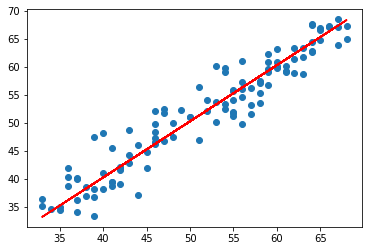

In [47]:
plt.plot(x_test, y_test, color='red')
plt.scatter(x_test, y_expected)
# plt.scatter(x_test, y_test, marker="x", c="r")